<a href="https://colab.research.google.com/github/Abonvicine/ESTUDOS---Neural-Networks/blob/main/ESTUDO_RNN_para_previs%C3%A3o_de_PETR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv("/content/petr4_treinamento_ex.csv")

In [4]:
base = base.dropna()
baseTreinamento = base.iloc[:, 1:2].values

In [5]:
normalizador = MinMaxScaler( feature_range=(0,1))
baseTreinamentoNormalizada = normalizador.fit_transform(baseTreinamento)

In [6]:
baseTreinamentoNormalizada

array([[0.68207343],
       [0.67429801],
       [0.69676026],
       ...,
       [0.86522678],
       [0.68466518],
       [0.71058315]])

In [7]:
previsores = []
valorReal = []

for i in range(90,len(base)):
    previsores.append(baseTreinamentoNormalizada[i-90:i,0])
    valorReal.append(baseTreinamentoNormalizada[i,0])

previsores, valorReal = np.array(previsores), np.array(valorReal)

In [8]:
print(previsores)

[[0.68207343 0.67429801 0.69676026 ... 0.66220307 0.66090713 0.66177106]
 [0.67429801 0.69676026 0.70323974 ... 0.66090713 0.66177106 0.67861771]
 [0.69676026 0.70323974 0.68725706 ... 0.66177106 0.67861771 0.67861771]
 ...
 [0.54773214 0.55464367 0.56673866 ... 0.89892009 0.94600432 0.89028073]
 [0.55464367 0.56673866 0.56803456 ... 0.94600432 0.89028073 0.86522678]
 [0.56673866 0.56803456 0.59265659 ... 0.89028073 0.86522678 0.68466518]]


In [9]:
previsores = np.reshape(previsores,(previsores.shape[0],previsores.shape[1],1))

In [10]:
previsores

array([[[0.68207343],
        [0.67429801],
        [0.69676026],
        ...,
        [0.66220307],
        [0.66090713],
        [0.66177106]],

       [[0.67429801],
        [0.69676026],
        [0.70323974],
        ...,
        [0.66090713],
        [0.66177106],
        [0.67861771]],

       [[0.69676026],
        [0.70323974],
        [0.68725706],
        ...,
        [0.66177106],
        [0.67861771],
        [0.67861771]],

       ...,

       [[0.54773214],
        [0.55464367],
        [0.56673866],
        ...,
        [0.89892009],
        [0.94600432],
        [0.89028073]],

       [[0.55464367],
        [0.56673866],
        [0.56803456],
        ...,
        [0.94600432],
        [0.89028073],
        [0.86522678]],

       [[0.56673866],
        [0.56803456],
        [0.59265659],
        ...,
        [0.89028073],
        [0.86522678],
        [0.68466518]]])

In [11]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True,input_shape = (previsores.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50))
model.add(Dropout(0.3))

model.add(Dense(units = 1, activation= "linear"))

model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics = ["mean_absolute_error"])

In [12]:
model.fit(previsores, valorReal, epochs = 100, batch_size=32)

Epoch 1/100
40/40 [==============================] - 13s 165ms/step - loss: 0.0764 - mean_absolute_error: 0.1894
Epoch 2/100
40/40 [==============================] - 7s 177ms/step - loss: 0.0135 - mean_absolute_error: 0.0902
Epoch 3/100
40/40 [==============================] - 7s 185ms/step - loss: 0.0180 - mean_absolute_error: 0.1025
Epoch 4/100
40/40 [==============================] - 7s 184ms/step - loss: 0.0223 - mean_absolute_error: 0.0998
Epoch 5/100
40/40 [==============================] - 7s 184ms/step - loss: 0.0114 - mean_absolute_error: 0.0824
Epoch 6/100
40/40 [==============================] - 7s 185ms/step - loss: 0.0092 - mean_absolute_error: 0.0745
Epoch 7/100
40/40 [==============================] - 7s 175ms/step - loss: 0.0090 - mean_absolute_error: 0.0709
Epoch 8/100
40/40 [==============================] - 8s 191ms/step - loss: 0.0075 - mean_absolute_error: 0.0657
Epoch 9/100
40/40 [==============================] - 8s 189ms/step - loss: 0.0064 - mean_absolute_error

In [13]:
model.save("content/PTR4_ex.h5")

In [14]:
baseTeste = pd.read_csv("/content/petr4_teste_ex.csv")
precoRealTeste = baseTeste.iloc[:, 1:2].values

In [15]:
baseCompleta = pd.concat((base["Open"],baseTeste["Open"]),axis = 0)

In [16]:
entradas = baseCompleta[len(baseCompleta)- len(baseTeste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

In [17]:
X_teste = []
for i in range(90, len(entradas)):
    X_teste.append(entradas[i-90:i,0])

X_teste = np.array(X_teste)

In [18]:
print(X_teste)

[[0.56803456 0.59265659 0.6112311  ... 0.86522678 0.68466518 0.71058315]
 [0.59265659 0.6112311  0.6095032  ... 0.68466518 0.71058315 0.64794821]
 [0.6112311  0.6095032  0.60734341 ... 0.71058315 0.64794821 0.59611231]
 ...
 [0.68120946 0.66306691 0.64060479 ... 0.46781857 0.45658747 0.43455724]
 [0.66306691 0.64060479 0.63974082 ... 0.45658747 0.43455724 0.50280778]
 [0.64060479 0.63974082 0.66090713 ... 0.43455724 0.50280778 0.51360691]]


In [19]:
X_teste = np.reshape(X_teste,(X_teste.shape[0], X_teste.shape[1],1))

In [20]:
previsoes = model.predict(X_teste)

In [21]:
previsoes = normalizador.inverse_transform(previsoes)

In [22]:
dif = previsoes.mean()-precoRealTeste.mean()

print(f"desvio em reais R$ {round(dif,2)}")

desvio em reais R$ 0.82


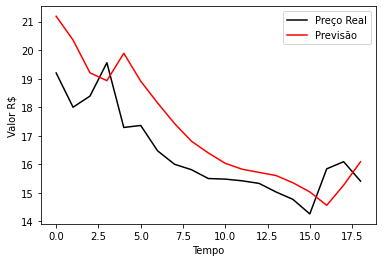

In [23]:
plt.plot(precoRealTeste, color = "black", label = "Preço Real")
plt.plot(previsoes, color = "red", label = "Previsão")
plt.xlabel("Tempo")
plt.ylabel("Valor R$")
plt.legend()
plt.show()